<a href="https://colab.research.google.com/github/schase15/DS-Unit-2-Kaggle-Challenge/blob/master/module4-classification-metrics/Steven_Chase_LS_DS_223_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 3*

---

# Cross-Validation


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


You won't be able to just copy from the lesson notebook to this assignment.

- Because the lesson was ***regression***, but the assignment is ***classification.***
- Because the lesson used [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html), which doesn't work as-is for _multi-class_ classification.

So you will have to adapt the example, which is good real-world practice.

1. Use a model for classification, such as [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. Use hyperparameters that match the classifier, such as `randomforestclassifier__ ...`
3. Use a metric for classification, such as [`scoring='accuracy'`](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)
4. If you’re doing a multi-class classification problem — such as whether a waterpump is functional, functional needs repair, or nonfunctional — then use a categorical encoding that works for multi-class classification, such as [OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html) (not [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html))



## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- Add your own stretch goals!
- Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/). See the previous assignment notebook for details.
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [184]:
from sklearn.model_selection import train_test_split

# Split train data into train and validate, 80/20 split

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

## Starting with yesterday's final model

In [185]:
# Explore different feature lists

# Pick features
# Drop id and recorded_by because they are unique identifiers
# Drop target
# Drop num_private because it is 99% zeros and no description on kaggle
# Drop region code, quantity_group and payment as they are identical to other columns
# Drop extraction_type_class and extraction_type_group because they are subsets of extraction_type
# Drop management_group because it is a  subset of management
# Drop source_type and source_class as they are subsets of source
# Drop water_point_typr_group because it is a subset of waterpoint_type
# Drop public_meeting and permit because it added nothing to my model

# Best scores with these features

features= train.columns.dropfeatures= train.columns.drop(['id', 'recorded_by', 
                      'status_group', 'num_private', 'region_code', 'source_class',
                      'extraction_type_class', 'extraction_type_group', 
                      'management_group', 'payment', 'quantity_group',
                      'source_type', 'waterpoint_type_group', 'permit', 'public_meeting'])

# submission #6
# (['id', 'status_group', 'num_private', 'region_code',
#                      'scheme_name', 'extraction_type', 'extraction_type_group', 
#                      'management','management_group', 'payment', 'quantity_group',
#                       'source_type', 'waterpoint_type_group', 'basin', 'region', 
#                       'public_meeting', 'permit', 'recorded_by', 'source_class',
#                       'scheme_management', 'water_quality', 'quality_group', 'source_class'])

# Submission #4
# (['id', 'status_group', 'num_private', 'region_code',
#                               'payment', 'recorded_by', 'public_meeting', 'permit',
#                               ] 
#                      )

target= 'status_group'

features

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'district_code', 'lga', 'ward', 'population', 'scheme_management',
       'scheme_name', 'construction_year', 'extraction_type', 'management',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')

In [0]:
# Split into train and validate target vector and feature matrices
X_train= train[features]
y_train= train[target]

X_val= val[features]
y_val= val[target]

# Set test feature matrix
X_test= test[features]

In [0]:
# Create a function that you can use on each train, val, test dataset to clean it all the same

import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning - create a copy
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Population column
    cols_with_zeros = ['date_recorded', 'amount_tsh', 'gps_height', 'funder', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'district_code', 'lga', 'ward', 'population',
       'scheme_management', 'construction_year', 'scheme_name',
       'extraction_type', 'management', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'source', 'waterpoint_type'
                      ]


    for col in cols_with_zeros:
        X[col] = X[col].replace({0: np.nan})

    # Convert district_code to categorical
    X['district_code'] = X['district_code'].apply(str)

    ### Feature engineering
  # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    # X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['age'] = X['year_recorded'] - X['construction_year']
    
    # 2nd engineered feature: how much the waterpump has been used over its life
    X['usage'] = (X['amount_tsh'] / X['population']) * X['age']

    # Fill missing categorical data with mode, fill missing numerical data with mean
    for column in X:
      if X[column].dtype == np.dtype('O'):
        X[column] = X[column].replace({'0': np.nan,
                                       'Not Known': np.nan,
                                       'Unknown': np.nan,
                                       'not known': np.nan,
                                       'not Known': np.nan,
                                       '-': np.nan,
                                       '1': np.nan,
                                       'None': np.nan,
                                       'none': np.nan
                                       })
        X[column] = X[column].replace({np.NaN: X[column].value_counts().index[0]})
      else:
        X[column] = X[column].replace({np.NaN: X[column].median()})

    # return the wrangled dataframe
    return X

In [0]:
# Wrangle all of the data frames that we have worked with

X_train= wrangle(X_train)

X_val= wrangle(X_val)

X_test= wrangle(X_test)

In [189]:
# Create a pipeline to do ordinal encoding, impute,
# and fit a random forest classifier

# Imports
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(max_depth= 20, n_estimators= 100)
)

# Fit on training data
pipeline.fit(X_train, y_train)

# Validation score
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9699705387205387
Validation Accuracy: 0.8088383838383838


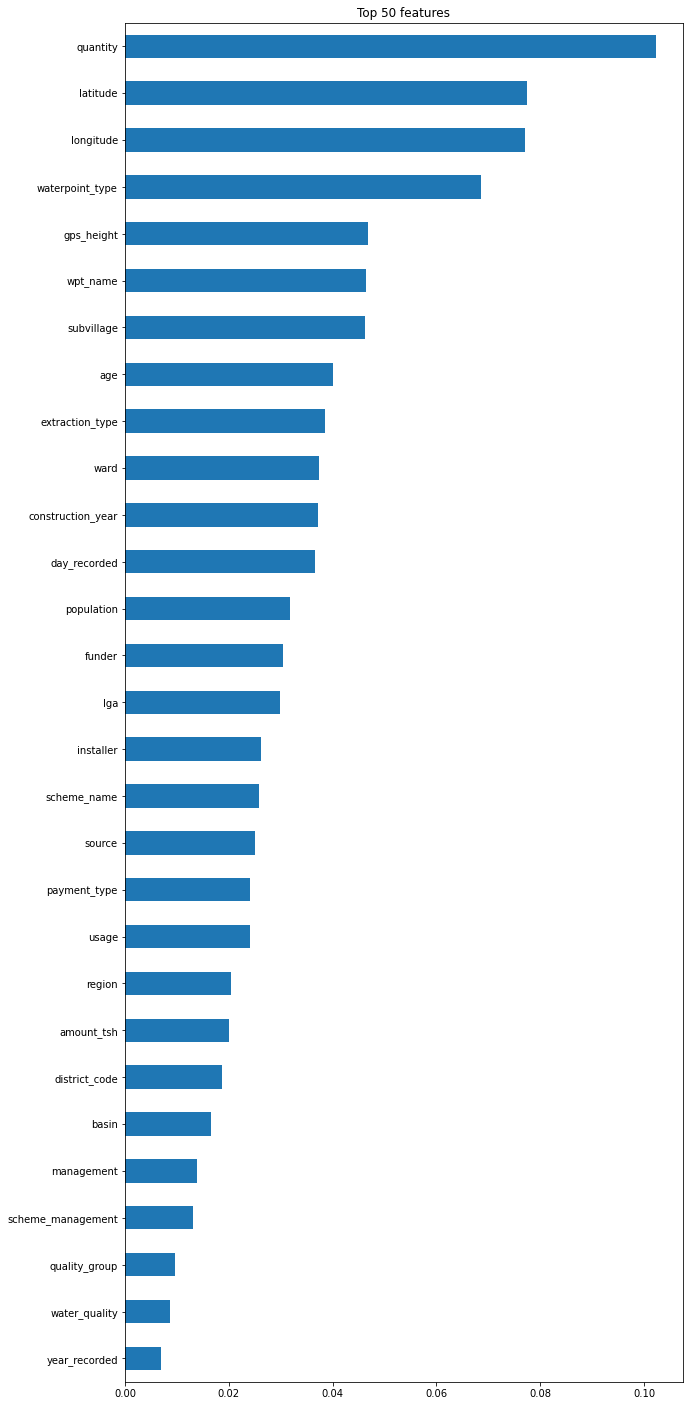

In [190]:
# Look at the feature importance

# Feature importances

%matplotlib inline
import matplotlib.pyplot as plt

# Pull out encoded X_train matrix
encoder = pipeline.named_steps['ordinalencoder']
encoded= encoder.transform(X_train)

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 50
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

## CV for tuning hyper-parameters

In [0]:
# Visualization of Validation Curve

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

depth = range(1, 30, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='randomforestclassifier__max_depth', 
    param_range=depth, scoring= 'accuracy',
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: randomforestclassifier max_depth')
plt.ylabel('model score: Accuracy Score')
plt.legend();

In [0]:
#  Use RandomizedForestCV for tuning hyper-parameters of model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Already have target and features set
# Pipeline is already set

# Set range of different parameters for CV to try
param_distributions = {
    'randomforestclassifier__max_depth': [18, 19, 20, 21, 22],
    'randomforestclassifier__n_estimators': randint(50, 500)
}

# Define RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline,
    param_distributions= param_distributions,
    n_iter= 10,
    cv= 5,
    scoring= 'accuracy',
    # return_train_score= True,
    random_state= 42,
    n_jobs= -1
)

search.fit(X_train, y_train);

In [0]:
# Return best parameters and score
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', -search.best_score_)

In [0]:
# Re-define pipeline that contains optimized hyper-parameters

pipeline = search.best_estimator_

In [0]:
# Validation accuracy

print('Validation Accuracy:', pipeline.score(X_val, y_val))

## Confusion Matrix

In [0]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot
plot_confusion_matrix(pipeline, X_val, y_val, xticks_rotation= 'vertical', normalize= 'pred')

# Enlarge
plt.rcParams['figure.dpi']= 200

In [0]:
# Look at precision and recall for each class
from sklearn.metrics import classification_report

# Make predictions
y_pred= pipeline.predict(X_val)

print(classification_report(y_val, y_pred))

## Create Submission

In [0]:
# Create predictions
y_pred= pipeline.predict(X_test)

In [0]:
# Submission
submission= test[['id']].copy()
submission['status_group'] = y_pred
submission

In [0]:
# Save submission
submission.to_csv('tanzanian_water_challenge_7.csv', index= False)

In [0]:
# Download to local computer
from google.colab import files
files.download('tanzanian_water_challenge_7.csv')